===== DQN Training =====
[DQN] Episode 0, Reward: 41.0, Epsilon: 0.924
[DQN] Episode 10, Reward: 23.0, Epsilon: 0.613
[DQN] Episode 20, Reward: 10.0, Epsilon: 0.445
[DQN] Episode 30, Reward: 10.0, Epsilon: 0.333
[DQN] Episode 40, Reward: 33.0, Epsilon: 0.193
[DQN] Episode 50, Reward: 9.0, Epsilon: 0.117
[DQN] Episode 60, Reward: 189.0, Epsilon: 0.014
[DQN] Episode 70, Reward: 265.0, Epsilon: 0.010
[DQN] Episode 80, Reward: 241.0, Epsilon: 0.010
[DQN] Episode 90, Reward: 290.0, Epsilon: 0.010
[DQN] Episode 100, Reward: 152.0, Epsilon: 0.010
[DQN] Episode 110, Reward: 150.0, Epsilon: 0.010
[DQN] Episode 120, Reward: 121.0, Epsilon: 0.010
[DQN] Episode 130, Reward: 148.0, Epsilon: 0.010
[DQN] Episode 140, Reward: 140.0, Epsilon: 0.010
[DQN] Episode 150, Reward: 119.0, Epsilon: 0.010
[DQN] Episode 160, Reward: 143.0, Epsilon: 0.010
[DQN] Episode 170, Reward: 179.0, Epsilon: 0.010
[DQN] Episode 180, Reward: 157.0, Epsilon: 0.010
[DQN] Episode 190, Reward: 120.0, Epsilon: 0.010
[DQN] Episode

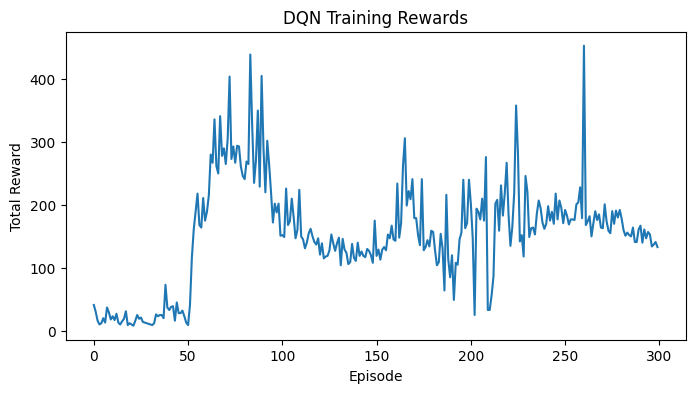

===== DQN Evaluation =====
Evaluation Episode 0 Reward: 167.0
Evaluation Episode 1 Reward: 174.0
Evaluation Episode 2 Reward: 157.0
DQN Evaluation Rewards: [167.0, 174.0, 157.0]


In [4]:
# In your Jupyter Notebook cell (예: cell1.ipynb)
import matplotlib.pyplot as plt
from lib import train_dqn, train_linear_q, evaluate_policy # lib.py가 현재 작업 디렉토리에 있어야 합니다.

# ---------------------------
# DQN을 이용한 학습 및 평가
# ---------------------------

print("===== DQN Training =====")
policy_net, dqn_rewards = train_dqn(num_episodes=300, render=False)

# 학습 보상 시각화
plt.figure(figsize=(8,4))
plt.plot(dqn_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("DQN Training Rewards")
plt.show()

# 학습된 DQN 모델 평가 및 렌더링 (실제 창이 뜨며 CartPole이 움직이는 것을 볼 수 있습니다)
print("===== DQN Evaluation =====")
eval_rewards_dqn = evaluate_policy(policy_net, n_episodes=3, render=True)
print("DQN Evaluation Rewards:", eval_rewards_dqn)


===== Linear Q-learning Training =====
[LinearQ] Episode 0, Reward: 20.0, Epsilon: 0.963
[LinearQ] Episode 10, Reward: 21.0, Epsilon: 0.619
[LinearQ] Episode 20, Reward: 13.0, Epsilon: 0.369
[LinearQ] Episode 30, Reward: 17.0, Epsilon: 0.243
[LinearQ] Episode 40, Reward: 17.0, Epsilon: 0.162
[LinearQ] Episode 50, Reward: 29.0, Epsilon: 0.107
[LinearQ] Episode 60, Reward: 19.0, Epsilon: 0.075
[LinearQ] Episode 70, Reward: 15.0, Epsilon: 0.055
[LinearQ] Episode 80, Reward: 12.0, Epsilon: 0.042
[LinearQ] Episode 90, Reward: 11.0, Epsilon: 0.034
[LinearQ] Episode 100, Reward: 10.0, Epsilon: 0.030
[LinearQ] Episode 110, Reward: 9.0, Epsilon: 0.026
[LinearQ] Episode 120, Reward: 10.0, Epsilon: 0.023
[LinearQ] Episode 130, Reward: 8.0, Epsilon: 0.021
[LinearQ] Episode 140, Reward: 10.0, Epsilon: 0.019
[LinearQ] Episode 150, Reward: 9.0, Epsilon: 0.018
[LinearQ] Episode 160, Reward: 10.0, Epsilon: 0.016
[LinearQ] Episode 170, Reward: 10.0, Epsilon: 0.015
[LinearQ] Episode 180, Reward: 9.0, Eps

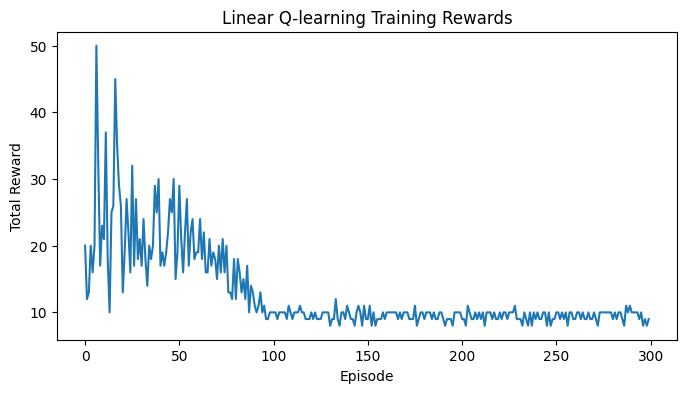

===== Linear Q-learning Evaluation =====
Evaluation Episode 0 Reward: 10.0
Evaluation Episode 1 Reward: 8.0
Evaluation Episode 2 Reward: 9.0
Linear Q-learning Evaluation Rewards: [10.0, 8.0, 9.0]


In [3]:


# ---------------------------
# 선형 Q-learning을 이용한 학습 및 평가
# ---------------------------
print("===== Linear Q-learning Training =====")
linear_model, linear_rewards = train_linear_q(num_episodes=300, render=False)

# 학습 보상 시각화
plt.figure(figsize=(8,4))
plt.plot(linear_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Linear Q-learning Training Rewards")
plt.show()

# 학습된 선형 모델 평가 및 렌더링
print("===== Linear Q-learning Evaluation =====")
eval_rewards_linear = evaluate_policy(linear_model, n_episodes=3, render=True)
print("Linear Q-learning Evaluation Rewards:", eval_rewards_linear)